In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

**VARIABLES:**

* bmi: indice de masa corporal.
* age: años.
* charges: cargos.
* sex: sexo.
* smoker: fumador.
* region: region.
* childres: niños.


In [4]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:xlabel='age', ylabel='charges'>

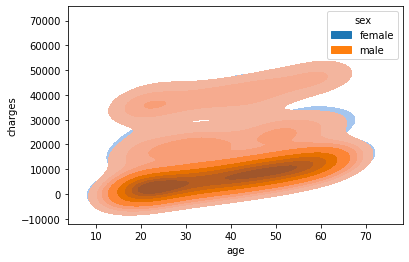

In [6]:
sns.kdeplot(data=df, x="age", y="charges", hue="sex", fill=True,)

In [7]:
nueva=pd.get_dummies(df, columns=["sex","smoker","region"]) #cambiar variables categoricas a numericas agrege ,drop_first=TRUE)
nueva

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


<AxesSubplot:xlabel='age', ylabel='charges'>

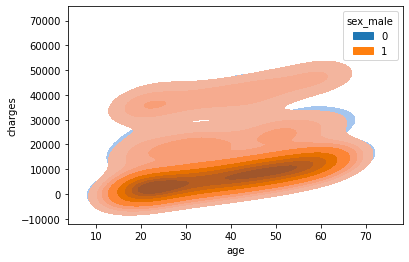

In [8]:
sns.kdeplot(data=nueva, x="age", y="charges", hue="sex_male", fill=True,)

<AxesSubplot:xlabel='charges', ylabel='Density'>

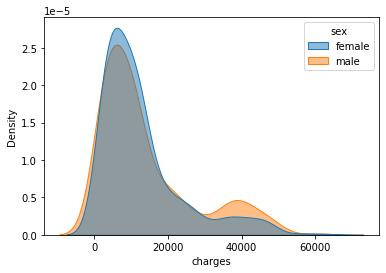

In [9]:
#sns.kdeplot(data=df, x="Salary", hue="League", fill=True,palette="crest",alpha=0.5)
sns.kdeplot(data=df, x="charges", hue="sex", fill=True,alpha=0.5) #alpha=0.5 es color

In [10]:
df = df.drop(["age"], axis = 1) # eliminando los años
df

,sex,bmi,children,smoker,region,charges
0,female,27.900,0,yes,southwest,16884.92400
1,male,33.770,1,no,southeast,1725.55230
2,male,33.000,3,no,southeast,4449.46200
3,male,22.705,0,no,northwest,21984.47061
4,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,male,30.970,3,no,northwest,10600.54830
1334,female,31.920,0,no,northeast,2205.98080
1335,female,36.850,0,no,southeast,1629.83350
1336,female,25.800,0,no,southwest,2007.94500


In [11]:
df.describe()

,bmi,children,charges
count,1338.000000,1338.000000,1338.000000
mean,30.663397,1.094918,13270.422265
std,6.098187,1.205493,12110.011237
min,15.960000,0.000000,1121.873900
25%,26.296250,0.000000,4740.287150
50%,30.400000,1.000000,9382.033000
75%,34.693750,2.000000,16639.912515
max,53.130000,5.000000,63770.428010


**Numero de variables vacias:**

In [12]:
nueva.isnull().sum().replace(0,np.nan).dropna()

Series([], dtype: float64)

In [13]:
nueva = nueva.dropna()
nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [14]:
variables_categoricas = ["region"]
variables_categoricas

['region']

In [15]:
variable_interes = "charges"
variable_interes

'charges'

In [16]:
X = nueva.drop([variable_interes], axis=1)
y = nueva[variable_interes].to_frame()
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [18]:
#print(X_train)
#print(y_train)
print(X_test)
#print(y_test)

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
764    45  25.175         2           1         0          1           0   
887    36  30.020         0           1         0          1           0   
890    64  26.885         0           1         0          0           1   
1293   46  25.745         3           0         1          1           0   
259    19  31.920         0           0         1          0           1   
...   ...     ...       ...         ...       ...        ...         ...   
109    63  35.090         0           0         1          0           1   
575    58  27.170         0           1         0          1           0   
535    38  28.025         1           0         1          1           0   
543    54  47.410         0           1         0          0           1   
846    51  34.200         1           1         0          1           0   

      region_northeast  region_northwest  region_southeast  region_southwest  
764     

**Minimo Cuadrados Ordinarios:**

In [19]:
lin_reg = LinearRegression().fit(X=X_train, y=y_train)
lin_reg

LinearRegression()

In [20]:
pd.DataFrame(lin_reg.coef_.flatten(), index = X.columns.tolist()) # Estimadores MCO, basados en optimización Numerica 

,0
age,256.975706
bmi,337.092552
children,425.278784
sex_female,9.295846
sex_male,-9.295846
smoker_no,-11825.564428
smoker_yes,11825.564428
region_northeast,459.585244
region_northwest,88.907918
region_southeast,-198.279052


In [21]:
y_predic = lin_reg.predict(X=X_test) # guardando las prediciones del modelo de regresion lineal
y_predic

array([[ 8969.55027444],
       [ 7068.74744287],
       [36858.41091155],
       [ 9454.67850053],
       [26973.17345656],
       [10864.11316424],
       [  170.28084137],
       [16903.45028662],
       [ 1092.43093614],
       [11218.34318352],
       [28101.68455267],
       [ 9377.73460205],
       [ 5263.0595179 ],
       [38416.04221107],
       [40255.82339284],
       [37098.25353123],
       [15240.39392306],
       [35912.88264434],
       [ 9112.52398703],
       [31461.92108909],
       [ 3847.68845883],
       [10130.12001517],
       [ 2370.54189389],
       [ 7140.21550828],
       [11301.76782638],
       [12961.65366224],
       [14509.47251876],
       [ 6159.8976107 ],
       [ 9963.85857263],
       [ 2177.85718217],
       [ 9115.93673493],
       [13073.68932159],
       [ 4561.82376202],
       [ 3408.20756033],
       [ 4459.81359745],
       [13032.06505076],
       [ 1979.99357292],
       [ 8813.28303302],
       [33271.29124448],
       [32585.51583927],


In [22]:
y_predic[:20]

array([[ 8969.55027444],
       [ 7068.74744287],
       [36858.41091155],
       [ 9454.67850053],
       [26973.17345656],
       [10864.11316424],
       [  170.28084137],
       [16903.45028662],
       [ 1092.43093614],
       [11218.34318352],
       [28101.68455267],
       [ 9377.73460205],
       [ 5263.0595179 ],
       [38416.04221107],
       [40255.82339284],
       [37098.25353123],
       [15240.39392306],
       [35912.88264434],
       [ 9112.52398703],
       [31461.92108909]])

In [23]:
rmse_l= mean_squared_error(
    y_true=y_test,
    y_pred=y_predic,
    squared=False
)
print("")
print(f"el error (rmse) es : {rmse_l}")


el error (rmse) es : 5796.284659276274


**Modelo Ridge:**

In [24]:
?RidgeCV

Init signature:
RidgeCV(
    alphas=(0.1, 1.0, 10.0),
    *,
    fit_intercept=True,
    normalize='deprecated',
    scoring=None,
    cv=None,
    gcv_mode=None,
    store_cv_values=False,
    alpha_per_target=False,
)
Docstring:     
Ridge regression with built-in cross-validation.

See glossary entry for :term:`cross-validation estimator`.

By default, it performs efficient Leave-One-Out Cross-Validation.

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alphas : ndarray of shape (n_alphas,), default=(0.1, 1.0, 10.0)
    Array of alpha values to try.
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha corresponds to ``1 / (2C)`` in other linear models such as
    :class:`~sklearn.linear_model.LogisticRegression` or
    :class:`~sklearn.svm.LinearSVC`.
    If using Leave-One-Out cross-valida

In [25]:
?np.logspace

Signature:
np.logspace(
    start,
    stop,
    num=50,
    endpoint=True,
    base=10.0,
    dtype=None,
    axis=0,
)
Docstring:
Return numbers spaced evenly on a log scale.

In linear space, the sequence starts at ``base ** start``
(`base` to the power of `start`) and ends with ``base ** stop``
(see `endpoint` below).

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    ``base ** start`` is the starting value of the sequence.
stop : array_like
    ``base ** stop`` is the final value of the sequence, unless `endpoint`
    is False.  In that case, ``num + 1`` values are spaced over the
    interval in log-space, of which all but the last (a sequence of
    length `num`) are returned.
num : integer, optional
    Number of samples to generate.  Default is 50.
endpoint : boolean, optional
    If true, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
base : array_like, optional
    The

In [26]:
n_alfas = 1000 # numero de alfas obtenidos

In [27]:
for i in np.logspace(10, -2, n_alfas):
    print(i)# 10^(seq), donde seq es un rango de 100 datos 10 a -2 

10000000000.0
9727203192.450558
9461848194.721992
9203731996.61823
8952657125.996382
8708431497.690723
8470868266.55742
8239785684.528511
8015006961.565413
7796360130.405221
7583677914.99719
7376797602.527746
7175560918.936921
6979813907.8306675
6789406812.696098
6604193962.330305
6424033659.394204
6248788072.006888
6078323128.297236
5912508413.831869
5751217071.841614
5594325706.169389
5441714286.865888
5293266058.360567
5148867450.137487
5008407989.848212
4871780218.794641
4738879609.717651
4609604486.828439
4483855948.021182
4361537789.208006
4242556430.717786
4126820845.702952
4014242490.499326
3904735236.8855557
3798215306.1907363
3694601205.19931
3593813663.8046255
3495775574.363279
3400411932.7037024
3307649780.7442427
3217418150.6763783
3129648010.6707506
3044272212.064306
2961225437.9880314
2880444153.396298
2801866556.459201
2725432531.281028
2651083601.9085417
2578762887.593798
2508415059.277541
2439986297.2595553
2373424250.023866
2308677994.187172
2245697995.5397716
218443

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [29]:
# asumimos con funcion de perdida la MSE (Mean Squared Error)
modelo_ridge = RidgeCV(
            alphas          = np.logspace(10, -2, n_alfas), # factor de castigo
            fit_intercept   = True, # que tenga intercpeto
            #normalize       = False, # que me normalice los datos
            store_cv_values = True) # deseamos que el modelo quede con los estimadores de la Validación Cruzada

_ = modelo_ridge.fit(X=X_train, y=y_train)

In [30]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo_ridge.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())


In [31]:
print("Con un factor de castigo en ", alphas[-1])
print("Nuestros Estimadores son:")
pd.DataFrame(coefs[-1], X.columns)

Con un factor de castigo en  0.01
Nuestros Estimadores son:


,0
age,256.856046
bmi,339.192274
children,475.499913
sex_female,65.639324
sex_male,-65.639324
smoker_no,-11923.989874
smoker_yes,11923.989874
region_northeast,586.991752
region_northwest,234.023401
region_southeast,-447.971644


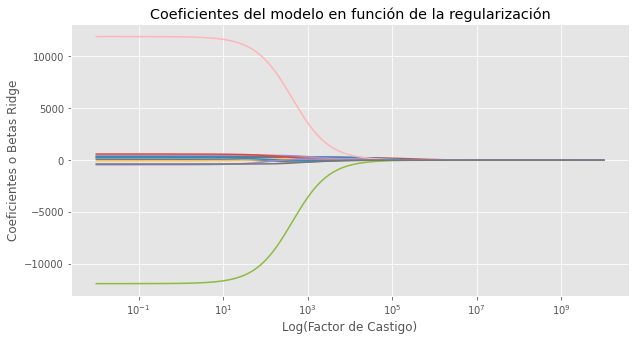

In [32]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Log(Factor de Castigo)')
ax.set_ylabel('Coeficientes o Betas Ridge')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [33]:
X.shape

(1338, 11)

In [34]:
modelo_ridge.cv_values_.reshape((-1, n_alfas)).shape # dimensiones (n_samples en la CV, n_observaciones, n_alphas)

(1070, 1000)

In [35]:
modelo_ridge.cv_values_.reshape((-1, n_alfas)).mean(axis=0).shape

(1000,)

In [36]:
# tenemos la funcion de perdida o MSE (Error cuadratico Medio) por cada nivel de castigo, usando los estimadores generados por la validación Cruzada
mse_cv = modelo_ridge.cv_values_.reshape((-1, n_alfas)).mean(axis=0) # MSE esperado por cada nivel de castigo

# dispersión de la funcion de perdida en la validación cruzada MSE
mse_sd = modelo_ridge.cv_values_.reshape((-1, n_alfas)).std(axis=0) # dispersion del MSE por cada nivel de castigo

# RMSE o Raiz Error cuadratico Medio por cada nivel de castigo
rmse_cv = np.sqrt(mse_cv) 

# RMSE o Raiz Error cuadratico Medio sobre la dispersión del MSE
rmse_sd = np.sqrt(mse_sd)
rmse_cv # Raiz error cuadratico medio por cada alpha de castigo

array([12025.10932067, 12025.10870394, 12025.10806992, 12025.10741811,
       12025.10674803, 12025.10605916, 12025.10535097, 12025.10462292,
       12025.10387445, 12025.103105  , 12025.10231397, 12025.10150075,
       12025.10066473, 12025.09980527, 12025.0989217 , 12025.09801336,
       12025.09707954, 12025.09611954, 12025.09513262, 12025.09411803,
       12025.09307498, 12025.09200268, 12025.09090032, 12025.08976704,
       12025.08860198, 12025.08740426, 12025.08617295, 12025.08490711,
       12025.08360577, 12025.08226794, 12025.0808926 , 12025.0794787 ,
       12025.07802514, 12025.07653083, 12025.07499462, 12025.07341533,
       12025.07179175, 12025.07012265, 12025.06840675, 12025.06664274,
       12025.06482926, 12025.06296494, 12025.06104834, 12025.05907799,
       12025.05705241, 12025.05497002, 12025.05282925, 12025.05062845,
       12025.04836595, 12025.04604001, 12025.04364885, 12025.04119065,
       12025.03866353, 12025.03606555, 12025.03339473, 12025.03064903,
      

In [37]:
# minimo Error Cuadratico Medio o Min error medio
min_rmse     = np.min(rmse_cv)
print("Minimo Error Cuadratico Medio: ",min_rmse)   
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
print("Desviación Estandar del Minimo Error Cuadratico Medio: ",sd_min_rmse)

Minimo Error Cuadratico Medio:  6162.698271236882
Desviación Estandar del Minimo Error Cuadratico Medio:  9083.725618253335


In [38]:
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
print("Error Cuadratico Medio a 1 Destivacion Estandar: ",min_rsme_1sd)
optimo       = modelo_ridge.alphas[np.argmin(rmse_cv)]
print("Factor de Castigo Optimo: ",optimo)
optimo_1sd   = modelo_ridge.alphas[rmse_cv == min_rsme_1sd]
print("Factor de Castigo basado a el Error Cuadratico Medio a 1 Desviacion Estandar: ",optimo_1sd)

Error Cuadratico Medio a 1 Destivacion Estandar:  12025.10932066773
Factor de Castigo Optimo:  0.9077326525210242
Factor de Castigo basado a el Error Cuadratico Medio a 1 Desviacion Estandar:  [1.e+10]


In [39]:
pd.DataFrame([modelo_ridge.alphas, rmse_cv], index = ["Factor de Castigo","RMSE"]).T

,Factor de Castigo,RMSE
0,1.000000e+10,12025.109321
1,9.727203e+09,12025.108704
2,9.461848e+09,12025.108070
3,9.203732e+09,12025.107418
4,8.952657e+09,12025.106748
...,...,...
995,1.116987e-02,6162.749233
996,1.086516e-02,6162.749267
997,1.056876e-02,6162.749301
998,1.028045e-02,6162.749333


In [40]:
pd.DataFrame([modelo_ridge.alphas, rmse_cv], index = ["Factor de Castigo","RMSE"]).T.describe().astype(str)

,Factor de Castigo,RMSE
count,1000.0,1000.0
mean,366573204.7900613,9499.348997508348
std,1313606250.8693023,2617.171121274921
min,0.01,6162.698271236882
25%,10.000713903744066,6167.566426580885
50%,10000.956268450487,11119.304400678468
75%,10000720.51607747,12003.76510902599
max,10000000000.0,12025.10932066773


**FACTOR DE CASTIGO VS FUNCION DE PERDIDA:**

1. Óptimo:              Alpha optimo es el alfa con un minimo RMSE.
2. Óptimo_1_Des._Est.:  Alpha asociado al factor de castigo con mayor regularización o con un factor de castigo mas alto pero que se encuentra dentro del intervalo de confianza RMSE (Intervalo superior).

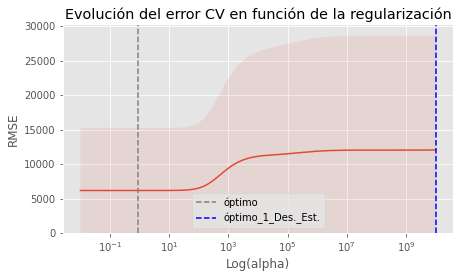

In [41]:
# Gráfico del error +- 1 desviación estándar
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo_ridge.alphas, rmse_cv) # factor de castigo , error cuadratico medio por cada factor de castigo
ax.fill_between(
    modelo_ridge.alphas, # factor de castigo
    rmse_cv + rmse_sd, # Intervalo de confianza superior del RMSE
    rmse_cv - rmse_sd,# Intervalo de confianza inferior del RMSE
    alpha=0.1 # nivel de oscuridad en el intervalo de confianza
)

# Linea vertical
ax.axvline(
    x         = optimo, # mejor Factor de castigo segun el RMSE
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo')

ax.axvline(
    x         = optimo_1sd, # factor de castigo con el RMSE a 1 desviacion estandar por encima
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1_Des._Est.') # esta relacionado al modelo mas regularizado en donde su error esta dentro de un error error estandar min

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('Log(alpha)')
ax.set_ylabel('RMSE')
plt.legend();

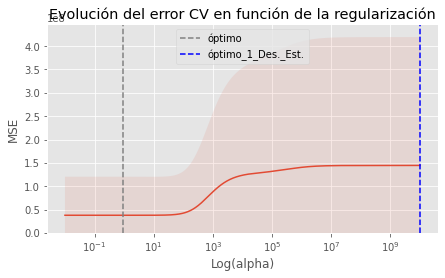

In [42]:
# Gráfico del error +- 1 desviación estándar
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo_ridge.alphas, mse_cv) # factor de castigo , error cuadratico medio por cada factor de castigo
ax.fill_between(
    modelo_ridge.alphas, # factor de castigo
    mse_cv + mse_sd, # Intervalo de confianza superior del RMSE
    mse_cv - mse_sd,# Intervalo de confianza inferior del RMSE
    alpha=0.1 # nivel de oscuridad en el intervalo de confianza
)

# Linea vertical
ax.axvline(
    x         = optimo, # mejor Factor de castigo segun el RMSE
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo')

ax.axvline(
    x         = optimo_1sd, # factor de castigo con el RMSE a 1 desviacion estandar por encima
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1_Des._Est.') # esta relacionado al modelo mas regularizado en donde su error esta dentro de un error error estandar min

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('Log(alpha)')
ax.set_ylabel('MSE')
plt.legend();

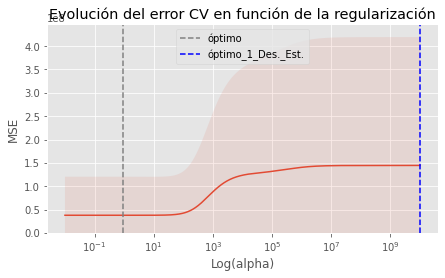

In [43]:
# Gráfico del error +- 1 desviación estándar
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo_ridge.alphas, mse_cv) # factor de castigo , error cuadratico medio por cada factor de castigo
ax.fill_between(
    modelo_ridge.alphas, # factor de castigo
    mse_cv + mse_sd, # Intervalo de confianza superior del RMSE
    mse_cv - mse_sd,# Intervalo de confianza inferior del RMSE
    alpha=0.1 # nivel de oscuridad en el intervalo de confianza
)

# Linea vertical
ax.axvline(
    x         = optimo, # mejor Factor de castigo segun el RMSE
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo')

ax.axvline(
    x         = optimo_1sd, # factor de castigo con el RMSE a 1 desviacion estandar por encima
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1_Des._Est.')

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('Log(alpha)')
ax.set_ylabel('MSE')
plt.legend();

In [44]:
print(f"Mejor valor de alpha encontrado: {modelo_ridge.alpha_}")
print(f"Mejor valor de alpha encontrado: {optimo}")

Mejor valor de alpha encontrado: 0.9077326525210242
Mejor valor de alpha encontrado: 0.9077326525210242


Text(0.5, 1.0, 'Coeficientes del modelo')

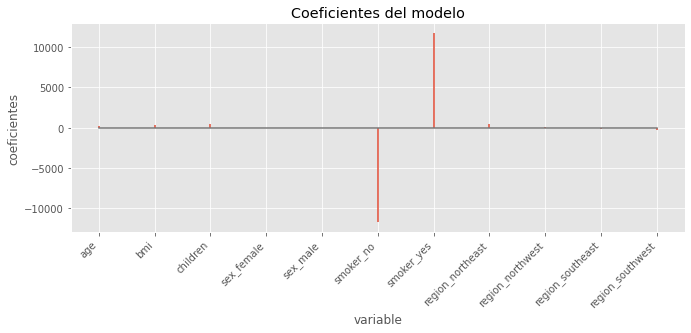

In [45]:
df_coeficientes_ridge = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_ridge.coef_.flatten()}
                  )

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes_ridge.predictor, df_coeficientes_ridge.coef, markerfmt=' ')
plt.xticks(rotation=45, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')

In [46]:
df_coeficientes_ridge # Modelo estimado con la Validación Cruzada

,predictor,coef
0,age,256.888165
1,bmi,337.008211
2,children,425.403187
3,sex_female,7.486173
4,sex_male,-7.486173
5,smoker_no,-11794.582818
6,smoker_yes,11794.582818
7,region_northeast,458.387250
8,region_northwest,87.160922
9,region_southeast,-195.230112


In [47]:
pd.DataFrame(coefs[alphas.tolist().index(optimo)], index = X.columns) # Modelo calibrado manualmente

,0
age,256.828525
bmi,339.086836
children,475.442794
sex_female,64.041758
sex_male,-64.041758
smoker_no,-11899.140104
smoker_yes,11899.140104
region_northeast,585.426582
region_northwest,232.062598
region_southeast,-444.291074


In [48]:
mod_ridge = Ridge().fit(X=X_train, y=y_train)
mod_ridge

Ridge()

In [49]:
y_prediciones=mod_ridge.predict(X=X_test)
y_prediciones[:5]

array([[ 8980.22899525],
       [ 7078.96608405],
       [36797.97785131],
       [ 9468.72623903],
       [26920.59698573]])

In [50]:
y_prediciones= mod_ridge.predict(X=X_test)
y_prediciones= y_prediciones.flatten()
y_prediciones[:10]

array([ 8980.22899525,  7078.96608405, 36797.97785131,  9468.72623903,
       26920.59698573, 10879.26021848,   182.8355153 , 16914.22251127,
        1105.20713354, 11231.82818139])

In [51]:
rmse_ridge= mean_squared_error(
    y_true=y_test,
    y_pred=y_prediciones,
    squared=False
)
print("")
print(f"el error (rmse) es : {rmse_ridge}")


el error (rmse) es : 5798.271036060348


**MODELO LASSO:**

In [ ]:
?LassoCV

In [52]:
print("No. de Factores de Riesgos:", n_alfas)

No. de Factores de Riesgos: 1000


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [54]:
modelo_lasso = LassoCV(
            alphas          = np.logspace(10, -2, n_alfas),
            fit_intercept = True,
            cv              = 10
         )
_ = modelo_lasso.fit(X = X_train, y = y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
alphas = modelo_lasso.alphas_
n_predictores_lasso = []
n_predictores_ridge = []
coefs_lasso = []

for alpha in alphas:
    modelo_temp1 = Lasso(alpha=alpha, fit_intercept=True)
    modelo_temp1.fit(X, y)
    coef_no_cero1 = np.sum(modelo_temp1.coef_.flatten() != 0)
    n_predictores_lasso.append(coef_no_cero1)
    coefs_lasso.append(modelo_temp1.coef_.flatten())

    modelo_temp = Ridge(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X, y)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)    
    n_predictores_ridge.append(coef_no_cero)


**Analisis del Factor de Castigo:**

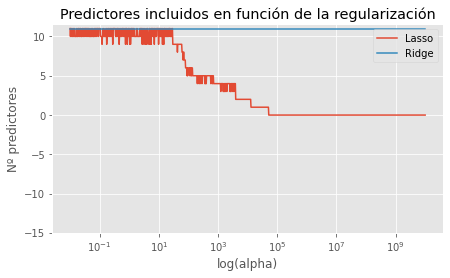

In [58]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores_lasso, label= "Lasso")
ax.plot(alphas, n_predictores_ridge, label= "Ridge")
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Nº predictores')
ax.legend()
ax.set_title('Predictores incluidos en función de la regularización');

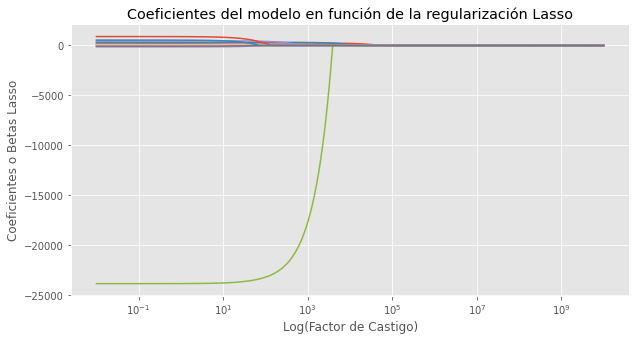

In [59]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
ax.set_xlabel('Log(Factor de Castigo)')
ax.set_ylabel('Coeficientes o Betas Lasso')
ax.set_title('Coeficientes del modelo en función de la regularización Lasso');
plt.axis('tight')
plt.show()

**Evolucion del error en lasso:**

In [62]:
?modelo_lasso # analisar atributos de las funciones

Object `modelo_lasso # analisar atributos de las funciones` not found.


In [61]:
mse_cv_lasso = modelo_lasso.mse_path_.mean(axis=1) # funcion de perdida esperada(error cuadratico medio) en la CV para cada valor de castigo alpha
mse_sd_lasso = modelo_lasso.mse_path_.std(axis=1) # desviacion del error cuadratico medio por CV para cada valor de castigo alpha

print(len(mse_cv_lasso))
print(len(modelo_lasso.alphas_))

1000
1000


In [63]:
# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv_lasso = np.sqrt(mse_cv_lasso) 
rmse_sd_lasso = np.sqrt(mse_sd_lasso) 

# Se identifica el óptimo y el óptimo + 1std
min_rmse_lasso     = np.min(rmse_cv_lasso) # minimo error encontrado (optimo)
sd_min_rmse_lasso  = rmse_sd[np.argmin(rmse_sd_lasso)] # extragio la desviacion estandar del mejor modelo
print("Minimo RMSE: ", min_rmse_lasso)
print("Desviacion del RMSE: ", sd_min_rmse_lasso)

# analizando el maximo factor de castigo dentro del intervalo de confianza (una desviacion arriba del mejor RMSE)
min_rsme_1sd_lasso = np.max(rmse_cv_lasso[rmse_cv_lasso <= min_rmse_lasso + sd_min_rmse_lasso])
# optimo del modelo
optimo_lasso       = modelo_lasso.alphas_[np.argmin(rmse_cv_lasso)]
# maximo alpha para tener un RMSE dentro del nivel de confianza del RMSE optimo

# muchas veces el RMSE converge pero es atipico
print("Numero de factores de castigos con RMSE maximo dentro del intervalo de Confianza:", len(modelo_lasso.alphas_[rmse_cv_lasso == min_rsme_1sd_lasso]))
optimo_1sd_lasso_max   = np.max(modelo_lasso.alphas_[rmse_cv_lasso == min_rsme_1sd_lasso])
optimo_1sd_lasso_min = np.min(modelo_lasso.alphas_[rmse_cv_lasso == min_rsme_1sd_lasso])

print("Mejor factor de Castigo: ",optimo_lasso)
print("Minimo mejor factor de castigo con RMSE a 1 sd: ",optimo_1sd_lasso_min)
print("Maximo mejor factor de castigo con RMSE a 1 sd: ",optimo_1sd_lasso_max)

Minimo RMSE:  6142.508493109571
Desviacion del RMSE:  13048.371676225119
Numero de factores de castigos con RMSE maximo dentro del intervalo de Confianza: 442
Mejor factor de Castigo:  57.51217071841614
Minimo mejor factor de castigo con RMSE a 1 sd:  50431.59487171359
Maximo mejor factor de castigo con RMSE a 1 sd:  10000000000.0


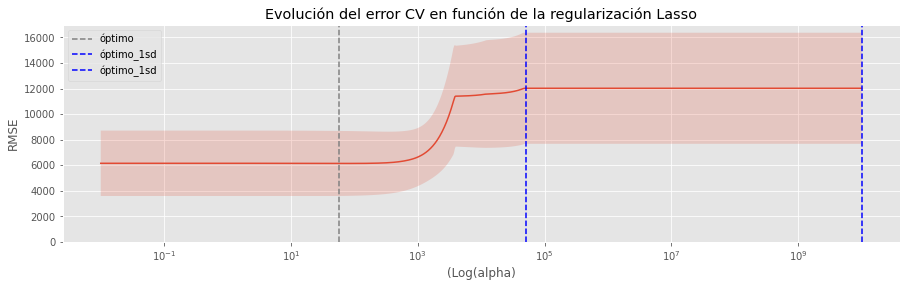

In [64]:
# Gráfico del error +- 1 desviación estándar
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(modelo_lasso.alphas_, rmse_cv_lasso)
ax.fill_between(
    modelo_lasso.alphas_,
    rmse_cv_lasso + rmse_sd_lasso,
    rmse_cv_lasso - rmse_sd_lasso,
    alpha=0.2
)

ax.axvline(x  = optimo_lasso,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(x  = optimo_1sd_lasso_min,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.axvline(x  = optimo_1sd_lasso_max,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)


ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización Lasso')
ax.set_xlabel('(Log(alpha)')
ax.set_ylabel('RMSE')
plt.legend()

In [66]:
modelo_lasso = Lasso(alpha=optimo_lasso, fit_intercept = True)
modelo_lasso.fit(X, y)

modelo_lasso1 = Lasso(alpha=optimo_1sd_lasso_min, fit_intercept = True)
modelo_lasso1.fit(X, y)

modelo_lasso2 = Lasso(alpha=optimo_1sd_lasso_max, fit_intercept = True)
modelo_lasso2.fit(X, y)


Lasso(alpha=10000000000.0)

In [67]:
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef Opt': modelo_lasso.coef_.flatten(),
                        'coef Opt + 1sd min':modelo_lasso1.coef_.flatten(),
                        'coef Opt + 1sd max':modelo_lasso2.coef_.flatten()})

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes_lasso[df_coeficientes_lasso["coef Opt"] != 0]

,predictor,coef Opt,coef Opt + 1sd min,coef Opt + 1sd max
0,age,2.571317e+02,2.054127,0.0
1,bmi,3.273176e+02,0.000000,0.0
2,children,4.372176e+02,0.000000,0.0
5,smoker_no,-2.346481e+04,-0.000000,-0.0
6,smoker_yes,1.302323e-11,0.000000,0.0
7,region_northeast,4.735377e+02,0.000000,0.0
8,region_northwest,1.156689e+02,-0.000000,-0.0
9,region_southeast,-4.821565e+01,0.000000,0.0
10,region_southwest,-2.398561e+00,-0.000000,-0.0


In [68]:
df_coeficientes_lasso[df_coeficientes_lasso["coef Opt + 1sd min"] != 0]

,predictor,coef Opt,coef Opt + 1sd min,coef Opt + 1sd max
0,age,257.131693,2.054127,0.0


In [69]:
df_coeficientes_lasso[df_coeficientes_lasso["coef Opt + 1sd max"] != 0]

,predictor,coef Opt,coef Opt + 1sd min,coef Opt + 1sd max


**PREDICCIONES:**

In [70]:
Estimadores = df_coeficientes_ridge.set_index("predictor")
Estimadores.columns = ["Ridge"]
Estimadores = pd.concat([Estimadores,pd.DataFrame(lin_reg.coef_.flatten(), index = X.columns.tolist(), columns = ["MCO"])], axis= 1)
Estimadores = pd.concat([Estimadores,df_coeficientes_lasso[["coef Opt","predictor"]].set_index("predictor").rename(columns = {"coef Opt":"Lasso"})], axis= 1)
Estimadores

,Ridge,MCO,Lasso
age,256.888165,256.975706,2.571317e+02
bmi,337.008211,337.092552,3.273176e+02
children,425.403187,425.278784,4.372176e+02
sex_female,7.486173,9.295846,0.000000e+00
sex_male,-7.486173,-9.295846,-0.000000e+00
smoker_no,-11794.582818,-11825.564428,-2.346481e+04
smoker_yes,11794.582818,11825.564428,1.302323e-11
region_northeast,458.387250,459.585244,4.735377e+02
region_northwest,87.160922,88.907918,1.156689e+02
region_southeast,-195.230112,-198.279052,-4.821565e+01


<AxesSubplot:>

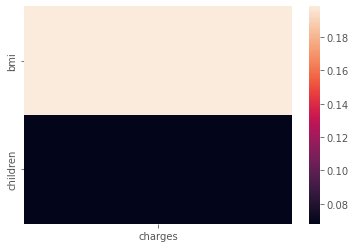

In [72]:
sns.heatmap(df.corr().loc["charges"].to_frame().drop("charges", axis = 0))

In [73]:
y_mco_hat = lin_reg.predict(X)
y_ridge_hat = modelo_ridge.predict(X)
y_lasso_hat = modelo_lasso.predict(X)

**Dispersión del error:**

In [74]:
res_modelos = pd.concat([pd.DataFrame(y_mco_hat).rename(columns = {0:"MCO"}),pd.DataFrame(y_ridge_hat).rename(columns = {0:"RIDGE"})], axis = 1)
res_modelos = pd.concat([res_modelos,pd.DataFrame(y_lasso_hat).rename(columns = {0:"LASSO"})], axis = 1)
res_modelos = pd.concat([res_modelos,y.reset_index().drop("index", axis =1)], axis = 1)
res_modelos

,MCO,RIDGE,LASSO,charges
0,25197.531061,25148.155186,25219.474030,16884.92400
1,3826.781929,3845.858371,3810.289927,1725.55230
2,6987.535290,7006.050071,7004.007632,4449.46200
3,3813.396616,3827.172836,3772.163513,21984.47061
4,5637.967419,5651.310373,5536.217710,3866.85520
...,...,...,...,...
1333,12243.889908,12255.854061,12160.334804,10600.54830
1334,3454.337913,3465.579703,3289.288162,2205.98080
1335,4458.339897,4473.412820,4381.210344,1629.83350
1336,1352.459258,1365.048637,1581.563546,2007.94500


<AxesSubplot:>

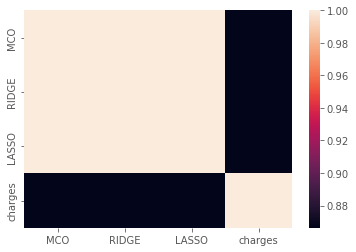

In [75]:
sns.heatmap(res_modelos.corr())

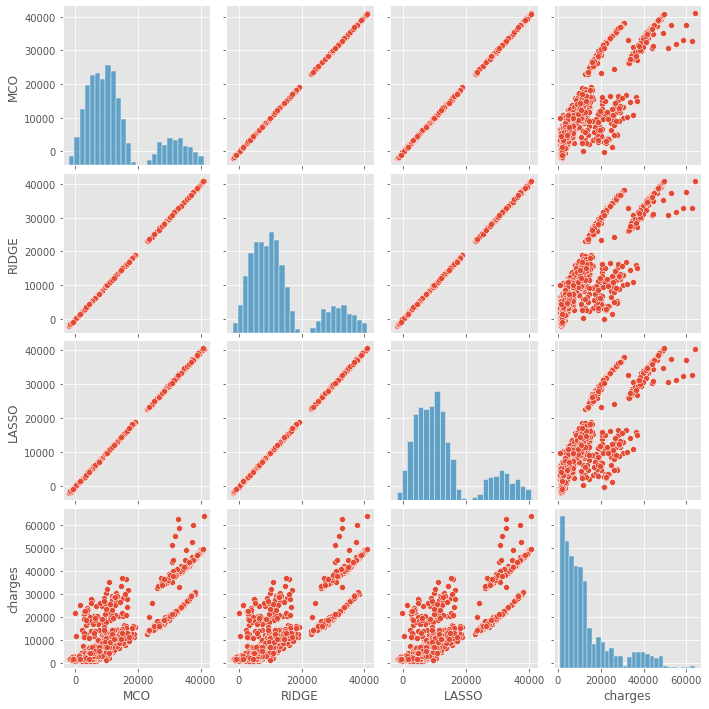

In [76]:
sns.pairplot(res_modelos)

**MCO con estimadores globales:**

In [87]:
import statsmodels.api as sm # modelo estadistico
import statsmodels.formula.api as smf # modelo estadistico

In [88]:
sm.add_constant(X)
model_MCO = sm.OLS(X,y)
results = model_MCO.fit()
?results

Type:            RegressionResultsWrapper
String form:     <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x17a864ac0>
File:            /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py
Docstring:      
Results class for for an OLS model.

Parameters
----------
model : RegressionModel
    The regression model instance.
params : ndarray
    The estimated parameters.
normalized_cov_params : ndarray
    The normalized covariance parameters.
scale : float
    The estimated scale of the residuals.
cov_type : str
    The covariance estimator used in the results.
cov_kwds : dict
    Additional keywords used in the covariance specification.
use_t : bool
    Flag indicating to use the Student's t in inference.
**kwargs
    Additional keyword arguments used to initialize the results.

See Also
--------
RegressionResults
    Results store for WLS and GLW models.

Notes
-----
Most of the methods and attri

In [78]:
Estimadores[Estimadores["Lasso"] != 0].index.tolist()

['age',
 'bmi',
 'children',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [103]:
mco_regul = smf.ols('charges ~ age+bmi+children+smoker_no+smoker_yes+region_northeast+region_northwest+region_southeast+region_southwest', data=nueva).fit()
mco_regul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Sat, 03 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:41:26   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -376.3422    553.201     -0.680      0.496   -1461.584     708.900
age                256.9736     11.891     21.610      0.000     233.646     280.301
bmi                338.6646     28.559     11.858      0.000     282.639     394.690
children           474.5665    137.740      3.445      0.001     204.355     744.778
smoker_no        -1.211e+04    326.781    -37.047      0.000   -1.27e+04   -1.15e+04
smoker_yes        1.173e+04    361.998     32.403      0.000     1.1e+04    1.24e+04
region_northeast   492.3937    309.238      1.592      0.112    -114.254    1099.041
region_northwest   140.2116    310.502      0.452      0.652    -468.915     749.338
region_southeast  -541.9665    347.262     -1.561      0.119   -1223.208     139.275
region_southwest  -466.9810    323.135     -1.445      0.149   -1100.890     166.928
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                     1.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
Betas_x = np.linalg.inv(X.T @ X) @ X.T @ y
Betas_x.index = X.columns
Betas_x.columns = ["Original MCO"]
Betas_x

,Original MCO
age,1.862528e+03
bmi,1.146034e+04
children,1.426217e+03
sex_female,6.932945e+19
sex_male,6.932945e+19
smoker_no,-6.932945e+19
smoker_yes,-6.932945e+19
region_northeast,5.141009e+04
region_northwest,3.573822e+04
region_southeast,6.561007e+03


In [105]:
pd.concat([Estimadores,mco_regul.params.to_frame().rename(columns = {0:"MCO Reg."}), Betas_x], axis = 1)

,Ridge,MCO,Lasso,MCO Reg.,Original MCO
age,256.888165,256.975706,2.571317e+02,256.973582,1.862528e+03
bmi,337.008211,337.092552,3.273176e+02,338.664638,1.146034e+04
children,425.403187,425.278784,4.372176e+02,474.566470,1.426217e+03
sex_female,7.486173,9.295846,0.000000e+00,NaN,6.932945e+19
sex_male,-7.486173,-9.295846,-0.000000e+00,NaN,6.932945e+19
smoker_no,-11794.582818,-11825.564428,-2.346481e+04,-12106.321353,-6.932945e+19
smoker_yes,11794.582818,11825.564428,1.302323e-11,11729.979149,-6.932945e+19
region_northeast,458.387250,459.585244,4.735377e+02,492.393677,5.141009e+04
region_northwest,87.160922,88.907918,1.156689e+02,140.211565,3.573822e+04
region_southeast,-195.230112,-198.279052,-4.821565e+01,-541.966450,6.561007e+03


In [106]:
y_hat_glob = X @ Betas_x
y_hat_glob.columns = y.columns
y_hat_glob

,charges
0,-43764.093484
1,-58974.993358
2,-50782.993358
3,-136293.784848
4,-62565.784848
...,...
1333,-5221.784848
1334,-22317.905169
1335,-9822.993358
1336,-101108.093484


In [107]:
y_hat_mco_reg = mco_regul.predict(X[Estimadores[Estimadores["Lasso"] != 0].index.tolist()])
y_hat_mco_reg



0       25217.897406
1        3512.165759
2        6770.262752
3        3827.056827
4        5661.337382
            ...     
1333    12418.370368
1334     3445.429837
1335     4080.686373
1336     1184.348329
1337    37014.218057
Length: 1338, dtype: float64

In [108]:
rmse_ridge = mean_squared_error(
                y_true  = y,
                y_pred  = y_ridge_hat,
                squared = False)

rmse_mco = mean_squared_error(
                y_true  = y,
                y_pred  = y_mco_hat,
                squared = False)

rmse_lasso = mean_squared_error(
                y_true  = y,
                y_pred  = y_lasso_hat,
                squared = False)
rmse_mco_glob = mean_squared_error(
                y_true  = y,
                y_pred  = np.array(y_hat_glob),
                squared = False)

rmse_mco_glob_reg = mean_squared_error(
                y_true  = y,
                y_pred  = np.array(y_hat_mco_reg),
                squared = False)

print("")
print(f"El error (rmse) en RIDGE es: {rmse_ridge}")
print(f"El error (rmse) en MCO es: {rmse_mco}")
print(f"El error (rmse) en MCO Global es: {rmse_mco_glob}")
print(f"El error (rmse) en MCO Regularizado es: {rmse_mco_glob_reg}")
print(f"El error (rmse) en LASSO es: {rmse_lasso}")


El error (rmse) en RIDGE es: 6045.254434879999
El error (rmse) en MCO es: 6044.867918611336
El error (rmse) en MCO Global es: 78296.36058319377
El error (rmse) en MCO Regularizado es: 6042.033215394104
El error (rmse) en LASSO es: 6048.796093874422


In [110]:
rmse_ridge= mean_squared_error(
    y_true=y_test,
    y_pred=y_prediciones,
    squared=False
)
print("")
print(f"el error (rmse)de RIDGE es : {rmse_ridge}")


el error (rmse)de RIDGE es : 5798.271036060348


DEL ANTERIOR ERROR DE RIDGE ES PARA MI EL MEJOR METODO EXPUESTO EL PROCESO DE LOS BLOQUES ANTERIORES AL 51